### Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import config
import hvplot

%matplotlib inline

ALPACA_API_KEY


In [2]:
# Load .env enviroment variables
load_dotenv('alpaca_keys.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url).json()
btc_response

# Fetch current ETH price
eth_response = requests.get(eth_url).json()
eth_response

# Compute current value of my crpto
btc_value = btc_response['data']['1']['quotes']['USD']['price']
eth_value = eth_response['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $57124.00
The current value of your 5.3 ETH is $3248.05


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key = os.getenv('SECRET_API_KEY')
base_url = 'https://paper-api.alpaca.markets'
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url,
    api_version="v2")


In [8]:

# Set the tickers
tickers = ["AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
date = pd.Timestamp("2024-02-26", tz="America/New_York").isoformat()


# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = date,
    limit = 1000
).df
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["AGG"])


# Preview Dataframe
ticker_data.head()


AGG                                             \
                            close    high    low trade_count   open   volume   
timestamp                                                                      
2024-02-26 05:00:00+00:00  97.130  97.350  96.97       27879  97.34  9374597   
2024-02-27 05:00:00+00:00  97.005  97.215  96.94       26507  97.10  7669617   

                                             
                                vwap symbol  
timestamp                                    
2024-02-26 05:00:00+00:00  97.149095    AGG  
2024-02-27 05:00:00+00:00  97.096690    AGG

In [9]:

# Set the tickers
tickers = ["SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Set start and end datetimes of 4 years from Today
date = pd.Timestamp("2024-02-26", tz="America/New_York").isoformat()


# Get current closing prices for SPY and AGG
ticker = alpaca.get_bars(
    tickers,
    timeframe,
    start = date,
    limit = 1000
).df
# Reorganize the DataFrame
ticker = pd.concat([ticker], axis=1, keys=["SPY"])


# Preview Dataframe
ticker.head()


SPY                                     \
                            close    high     low trade_count   open   
timestamp                                                              
2024-02-26 05:00:00+00:00  505.99  508.75  505.86      433719  508.3   
2024-02-27 05:00:00+00:00  506.63  506.87  504.75      342375  506.7   

                                                        
                             volume        vwap symbol  
timestamp                                               
2024-02-26 05:00:00+00:00  50353919  507.080345    SPY  
2024-02-27 05:00:00+00:00  31786798  505.972750    SPY

In [10]:
# Combine Both Ticker Data
combined_tickers = pd.concat((ticker_data,ticker),axis="columns", join="inner")

combined_tickers.head()

AGG                                             \
                            close    high    low trade_count   open   volume   
timestamp                                                                      
2024-02-26 05:00:00+00:00  97.130  97.350  96.97       27879  97.34  9374597   
2024-02-27 05:00:00+00:00  97.005  97.215  96.94       26507  97.10  7669617   

                                                SPY                  \
                                vwap symbol   close    high     low   
timestamp                                                             
2024-02-26 05:00:00+00:00  97.149095    AGG  505.99  508.75  505.86   
2024-02-27 05:00:00+00:00  97.096690    AGG  506.63  506.87  504.75   

                                                                           
                          trade_count   open    volume        vwap symbol  
timestamp                                                                  
2024-02-26 05:00:00+00:00      433719  508.3  50353919  507.080345    SPY  
2024-02-27 05:00:00+00:00      342375  506.7  31786798  505.972750    SPY

In [50]:
# Pick AGG and SPY close prices
agg_close_price = (combined_tickers["AGG"]["close"])
spy_close_price = (combined_tickers["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2024-02-26 05:00:00+00:00    97.130
2024-02-27 05:00:00+00:00    97.005
Name: close, dtype: float64
Current SPY closing price: $timestamp
2024-02-26 05:00:00+00:00    505.99
2024-02-27 05:00:00+00:00    506.63
Name: close, dtype: float64


In [12]:
# Pick AGG and SPY close prices
agg_close_price = (combined_tickers["AGG"]["close"])
spy_close_price = (combined_tickers["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $timestamp
2024-02-26 05:00:00+00:00    97.130
2024-02-27 05:00:00+00:00    97.005
Name: close, dtype: float64
Current SPY closing price: $timestamp
2024-02-26 05:00:00+00:00    505.99
2024-02-27 05:00:00+00:00    506.63
Name: close, dtype: float64


In [13]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
# Print current value of shares
print(f"Current SPY Value: ${my_spy_value}")
print(f"Current AGG Value: ${my_agg_value}")

Current SPY Value: $timestamp
2024-02-26 05:00:00+00:00    25299.5
2024-02-27 05:00:00+00:00    25331.5
Name: close, dtype: float64
Current AGG Value: $timestamp
2024-02-26 05:00:00+00:00    19426.0
2024-02-27 05:00:00+00:00    19401.0
Name: close, dtype: float64


### Savings Health Analysis

In [47]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_holdings = btc_value + eth_value
stock_holdings = my_spy_value + my_agg_value

attributes = {'Value': [crypto_holdings, stock_holdings],
              'asset': ['Crypto', 'Stocks']
             }
# Create savings DataFrame
df_savings = pd.DataFrame(attributes, index =["Crypto","Stocks"])
# Display savings DataFrame
display(df_savings)

,Value,asset
Crypto,60372.05,Crypto
Stocks,timestamp 2024-02-26 05:00:00+00:00 44725.5...,Stocks


In [48]:
# Plot savings pie chart
df_savings.plot.pie()


ValueError: pie requires either y column or 'subplots=True'

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

# Validate saving health
# YOUR CODE HERE!

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [17]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2019-02-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-02-27', tz='America/New_York').isoformat()

start_date2 = pd.Timestamp('2021-02-28', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2024-02-27', tz='America/New_York').isoformat()


In [21]:

# Set the tickers
tickers_select = ["AGG"]


# Set start and end datetimes of 4 years from Today
start_date = pd.Timestamp('2019-02-27', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2024-02-27', tz='America/New_York').isoformat()


# Get current closing prices for SPY and AGG
agg_data = alpaca.get_bars(
    tickers_select,
    timeframe,
    start = start_date,
    end = end_date,
    limit = 1000
).df
# Reorganize the DataFrame
agg_data = pd.concat([agg_data], axis=1, keys=["AGG"])


# Preview Dataframe
agg_data.head()
agg_data.tail()

AGG                                              \
                           close     high    low trade_count   open   volume   
timestamp                                                                      
2023-02-08 05:00:00+00:00  99.24  99.4300  98.95       22798  99.14  4900645   
2023-02-09 05:00:00+00:00  98.85  99.5600  98.83       23630  99.54  5594835   
2023-02-10 05:00:00+00:00  98.42  98.8300  98.40       18942  98.82  5063187   
2023-02-13 05:00:00+00:00  98.72  98.7200  98.46       17374  98.49  6832726   
2023-02-14 05:00:00+00:00  98.37  98.7574  98.11       23224  98.67  9559496   

                                             
                                vwap symbol  
timestamp                                    
2023-02-08 05:00:00+00:00  99.126410    AGG  
2023-02-09 05:00:00+00:00  99.234827    AGG  
2023-02-10 05:00:00+00:00  98.520152    AGG  
2023-02-13 05:00:00+00:00  98.638056    AGG  
2023-02-14 05:00:00+00:00  98.377191    AGG

In [23]:

# Set the tickers
tickers_selecte = ["SPY"]


# Set start and end datetimes of 4 years from Today
start_date2 = pd.Timestamp('2019-02-27', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2024-02-27', tz='America/New_York').isoformat()


# Get current closing prices for SPY and AGG
spy_data = alpaca.get_bars(
    tickers_selecte,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit = 1000
).df
# Reorganize the DataFrame
spy_data = pd.concat([spy_data], axis=1, keys=["SPY"])


# Preview Dataframe
spy_data.head()


SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2019-02-27 05:00:00+00:00  279.18  279.59  277.48      275537  278.52   
2019-02-28 05:00:00+00:00  278.65  279.45  278.32      249641  278.96   
2019-03-01 05:00:00+00:00  280.41  280.88  278.82      301015  280.44   
2019-03-04 05:00:00+00:00  279.38  281.87  276.84      451991  281.60   
2019-03-05 05:00:00+00:00  279.06  279.76  278.41      234839  279.54   

                                                         
                              volume        vwap symbol  
timestamp                                                
2019-02-27 05:00:00+00:00   58056699  278.806450    SPY  
2019-02-28 05:00:00+00:00   71882901  278.814298    SPY  
2019-03-01 05:00:00+00:00   80364273  280.098865    SPY  
2019-03-04 05:00:00+00:00  109422531  279.176650    SPY  
2019-03-05 05:00:00+00:00   61491071  279.190307    SPY

In [54]:

# Reorganize the DataFrame
# Separate ticker data
df_stock_data = pd.concat((spy_data, agg_data), axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()


SPY                                      \
                            close    high     low trade_count    open   
timestamp                                                               
2019-02-27 05:00:00+00:00  279.18  279.59  277.48      275537  278.52   
2019-02-28 05:00:00+00:00  278.65  279.45  278.32      249641  278.96   
2019-03-01 05:00:00+00:00  280.41  280.88  278.82      301015  280.44   
2019-03-04 05:00:00+00:00  279.38  281.87  276.84      451991  281.60   
2019-03-05 05:00:00+00:00  279.06  279.76  278.41      234839  279.54   

                                                            AGG            \
                              volume        vwap symbol   close      high   
timestamp                                                                   
2019-02-27 05:00:00+00:00   58056699  278.806450    SPY  107.26  107.4000   
2019-02-28 05:00:00+00:00   71882901  278.814298    SPY  107.07  107.2900   
2019-03-01 05:00:00+00:00   80364273  280.098865    SPY  106.63  106.8400   
2019-03-04 05:00:00+00:00  109422531  279.176650    SPY  106.76  106.8399   
2019-03-05 05:00:00+00:00   61491071  279.190307    SPY  106.83  106.8400   

                                                                               \
                                low trade_count    open    volume        vwap   
timestamp                                                                       
2019-02-27 05:00:00+00:00  107.2100       13458  107.40   3087811  107.279660   
2019-02-28 05:00:00+00:00  107.0300       22429  107.26  18066354  107.081925   
2019-03-01 05:00:00+00:00  106.6100       19714  106.77   5811522  106.679801   
2019-03-04 05:00:00+00:00  106.6900       15049  106.74   4052384  106.766793   
2019-03-05 05:00:00+00:00  106.6701       13808  106.73   7309756  106.795632   

                                  
                          symbol  
timestamp                         
2019-02-27 05:00:00+00:00    AGG  
2019-02-28 05:00:00+00:00    AGG  
2019-03-01 05:00:00+00:00    AGG  
2019-03-04 05:00:00+00:00    AGG  
2019-03-05 05:00:00+00:00    AGG

In [55]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [56]:
# Printing the simulation input data
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 110.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 120.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 130.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 140.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 150.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 160.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 170.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 180.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 190.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 200.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 210.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 220.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 230.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 240.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 250.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 260.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 270.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 280.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 290.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 300.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 310.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 320.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 330.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 340.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 350.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 360.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 370.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 380.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 390.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 400.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 410.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 420.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 430.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 440.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 450.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 460.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 470.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 480.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 490.


C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\vicky\Downloads\Fintech\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: Performa

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996323,1.008242,0.999207,1.004236,0.985934,0.989499,1.004865,1.006896,0.994452,0.988791,...,0.988373,1.001623,1.004579,1.006890,0.988959,1.003773,1.001581,1.006422,0.997695,0.999780
2,0.994270,0.998124,0.981900,0.993196,0.998914,0.975040,0.999011,1.022930,0.988353,0.991468,...,0.985154,0.996529,1.009645,1.018815,0.992226,0.993949,1.006771,1.008849,1.016646,1.008167
3,0.999595,1.004558,0.994290,0.985603,1.013813,0.992908,1.005692,1.015724,0.997421,0.995273,...,0.993717,0.991517,1.017703,1.009892,0.983062,0.992258,1.015026,1.017423,1.018186,1.011817
4,0.990010,0.999271,0.999936,0.986506,1.004333,0.976995,1.004233,1.027581,0.999150,0.993890,...,0.988489,1.004058,1.016921,1.018146,0.993335,0.986202,1.018048,1.022861,1.009232,1.021481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.705530,11.656842,1.714119,2.769329,2.233623,18.211394,6.350234,18.147689,4.215354,5.578766,...,6.050505,1.940153,6.070545,10.237072,15.894973,4.000522,18.427890,21.421420,1.766386,1.837251
7557,5.685698,11.664074,1.725897,2.816940,2.263133,18.459480,6.385556,17.999133,4.168159,5.646243,...,6.040928,1.963788,6.044642,10.282035,15.942480,3.987408,18.540174,21.781706,1.783438,1.858618
7558,5.713864,11.638205,1.747122,2.841814,2.267408,18.065897,6.461488,18.024923,4.171543,5.656950,...,6.025538,1.941973,6.010298,10.182331,15.853497,3.977525,18.196851,21.833796,1.787406,1.851946
7559,5.670032,11.500020,1.713289,2.827944,2.260875,18.227478,6.441528,18.073579,4.173342,5.670076,...,5.990106,1.949327,5.983293,10.289844,15.923695,3.928390,18.302805,21.524428,1.805463,1.867050


In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009035,1.019800,1.007274,0.993537,0.999989,1.006793,0.987234,0.991026,0.999287,0.989965,...,1.008802,0.990631,0.998367,0.996306,1.005638,0.999298,1.003740,0.995918,0.997987,0.987705
2,1.015749,1.016643,1.021442,0.987915,1.000572,1.007587,0.989688,0.995665,1.004104,0.985250,...,1.010723,0.982956,0.998577,0.981389,1.018035,1.000601,1.002730,0.980490,1.011566,0.984374
3,0.991994,1.011483,1.030600,0.997095,0.997604,1.005709,0.994743,0.997920,0.994627,0.997900,...,1.012315,0.989154,0.981850,0.971472,1.006515,1.002006,1.004207,0.984857,1.011721,0.987595
4,0.987360,1.008866,1.034499,1.000035,0.996255,1.003667,0.994341,0.979276,0.999065,0.996478,...,1.016074,0.968970,0.987125,0.972621,1.010508,1.005873,1.004374,0.987862,1.008460,1.000726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,15.161399,13.710953,7.014478,13.250531,17.253323,6.504709,17.273753,8.488013,10.957276,13.189109,...,8.223420,12.288181,12.515016,19.375254,10.173651,22.237832,29.862674,5.580458,13.105158,4.897044
7557,15.177512,13.738440,7.043751,13.102212,17.417942,6.477584,17.095762,8.496915,10.990621,12.939785,...,8.340971,12.323093,12.494097,19.483966,10.183564,22.458175,30.326832,5.621498,12.995128,4.964084
7558,15.330981,13.708830,7.038211,13.151718,17.470599,6.487290,16.977758,8.420851,10.888101,13.032973,...,8.363106,12.358473,12.505053,19.621043,10.328272,22.774489,30.055585,5.658289,13.078240,4.966424
7559,15.247704,13.672925,7.101012,13.252124,17.570481,6.403013,17.077302,8.521628,10.773828,12.927884,...,8.216022,12.349652,12.489294,19.596308,10.443810,22.852504,30.026844,5.669949,13.204933,4.931674


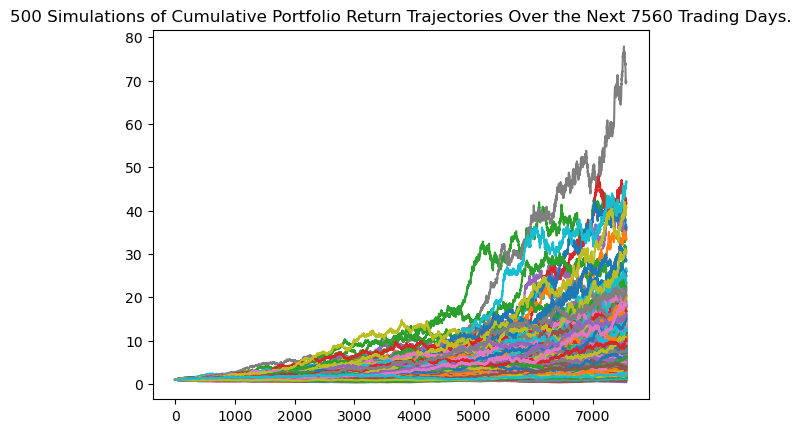

In [57]:
# Plot simulation outcomes
simulation_plot = MC_portfolio.plot_simulation()

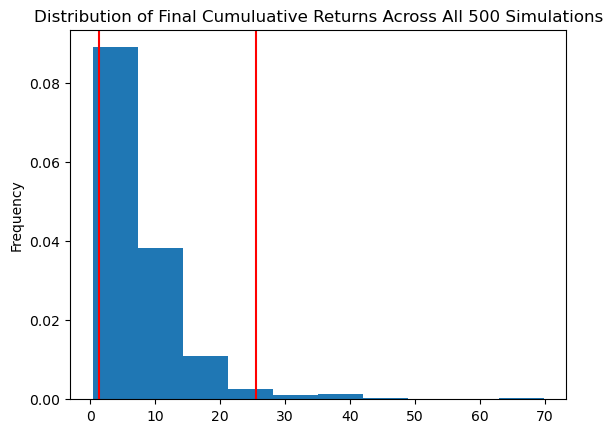

In [58]:
# Plot probability distribution and confidence intervals
Probability_plot = MC_portfolio.plot_distribution()

### Retirement Analysis

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [68]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'summary_tbl' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [64]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'summary_tbl' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


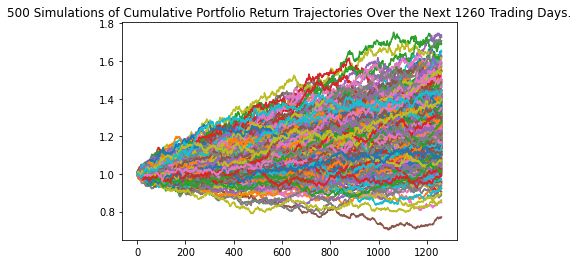

In [26]:
# Plot simulation outcomes
# YOUR CODE HERE!

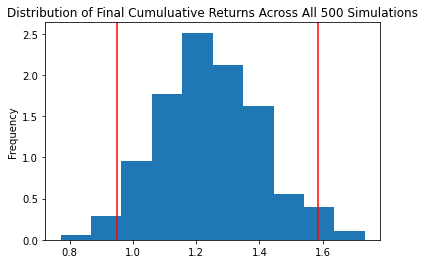

In [27]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [29]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


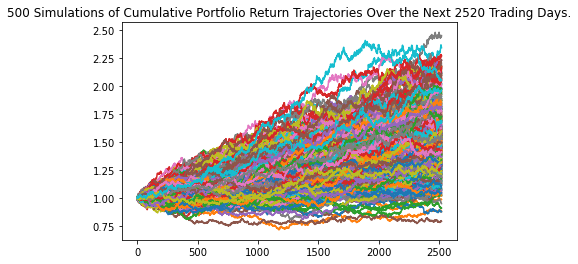

In [32]:
# Plot simulation outcomes
# YOUR CODE HERE!

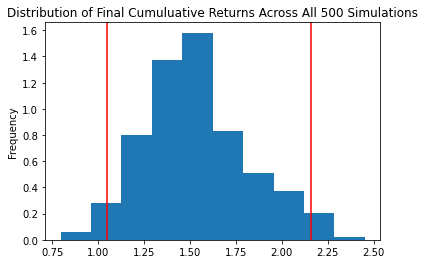

In [33]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [35]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
